# Exercise Sheet 2

In [117]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
%matplotlib inline

## 2.3 Euler moving forward

### a)

In [118]:
tau = 10
t_0 = 100
u_0 = 0
t_sim = 200
dt_list = np.array([30,20,10,5,0.1])

In [119]:
I_step = lambda I_0,t_0,t: I_0 if t >= t_0 else 0
F_stable = lambda u,t: (-u + I_step(1,t_0,t))/tau

In [120]:
def euler(x_0, F, dt_list, t_sim):
    for (i, dt) in enumerate(dt_list):
        x = x_0
        t = 0
        x_list = [ x ]
        t_list = [ t ]
        while t < t_sim:
            dx = dt * F(x,t)
            x = x + dx
            x_list += [ x ]
            t = t + dt
            t_list += [ t ]
        fig = plt.figure()
        x_list = np.array(x_list)
        if len(np.shape(x_list))>1:
            x_list = x_list[:,0]
        plt.plot(t_list,x_list)

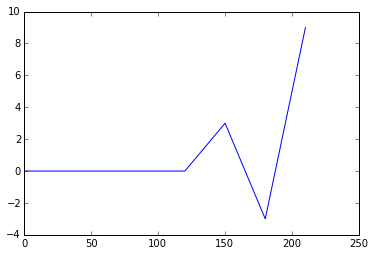

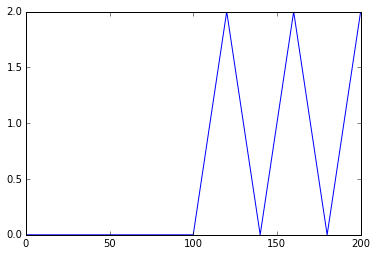

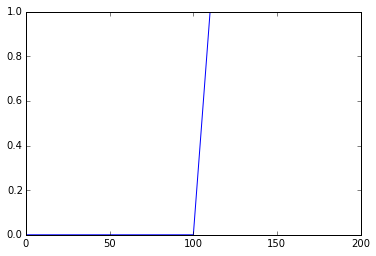

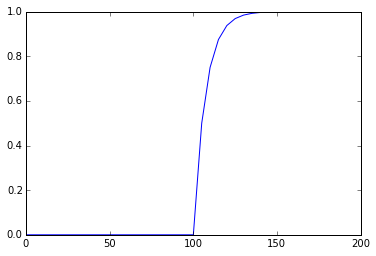

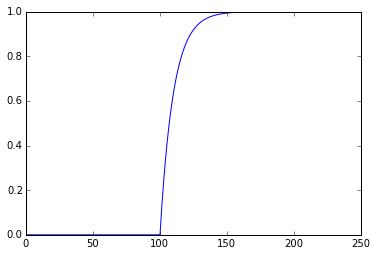

In [121]:
euler(x_0=0, F=F_stable, dt_list=dt_list, t_sim=t_sim)

### b)

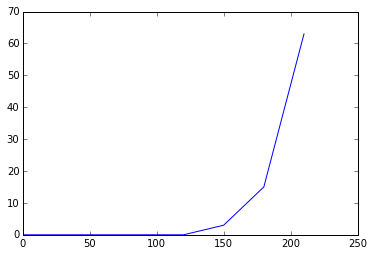

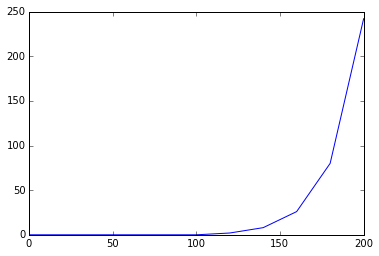

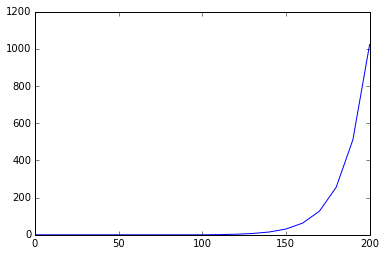

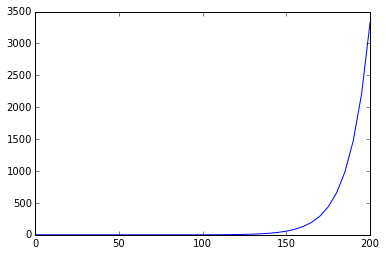

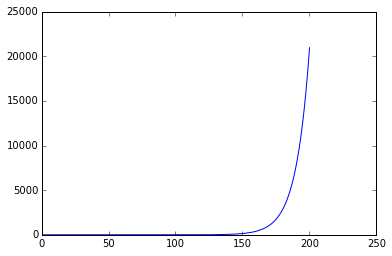

In [122]:
F_unstable = lambda u,t: (u + I_step(1,t_0,t))/tau
euler(x_0=0, F=F_unstable, dt_list=dt_list, t_sim=t_sim)

### c)

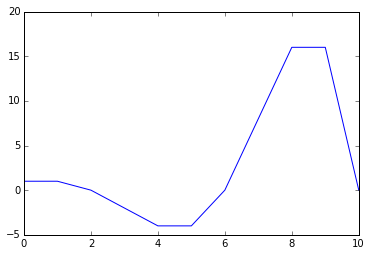

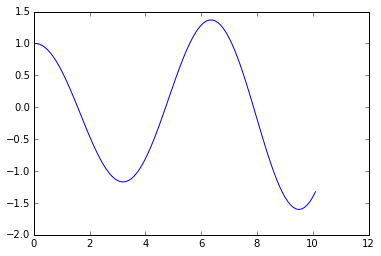

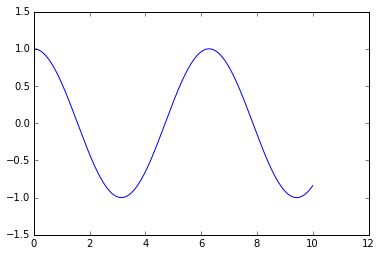

In [123]:
F_osc2d = lambda x,t: np.dot(np.array([[0,1],[-1,0]]),x)
euler(x_0=np.array([1,0]), F=F_osc2d, dt_list=[1,0.1,1e-5], t_sim=10)

### d)

In [124]:
E = np.array([10.6,115,-12]) # in mV
tau = np.array([0.3,120,36])*const.micro/const.nano/const.milli

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWar

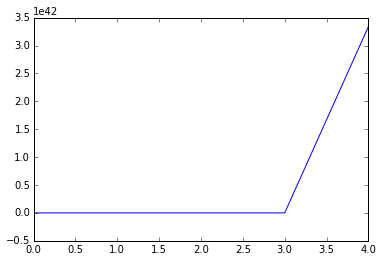

In [125]:
I_spike = 0
t_0 = 100
udot = lambda x,t: tau[0]*(E[0]-x[0])+tau[1]*x[2]**3*x[3]*(E[1]-x[0])+tau[2]*x[1]**4*(E[2]-x[0])+I_step(I_spike,t_0,t)
a_n = lambda u: (0.1-0.01*u)/(np.exp(1-0.1*u)-1)
b_n = lambda u: 0.125*np.exp(-u/80)
a_m = lambda u: (2.5-0.1*u)/(np.exp(2.5-0.1*u)-1)
b_m = lambda u: 4*np.exp(-u/18)
a_h = lambda u: 0.07*np.exp(-u/20)
b_h = lambda u: 1/(np.exp(3-0.1*u)+1)
ndot = lambda x,t: -x[1]*b_n(x[0])+(1-x[1])*a_n(x[0])
mdot = lambda x,t: -x[2]*b_m(x[0])+(1-x[2])*a_m(x[0])
hdot = lambda x,t: -x[3]*b_h(x[0])+(1-x[3])*a_h(x[0])
F_HH = lambda x,t: np.array([ udot(x,t), ndot(x,t), mdot(x,t), hdot(x,t) ])
euler(x_0=np.array([E[0],0,0,0]),F=F_HH,dt_list=[ 1 ],t_sim=200)

the values run away super quickly, no idea why